### Bootstrapping

https://medium.com/machine-learning-t%C3%BCrkiye/streamlit-ile-web-uygulamalar%C4%B1na-giri%C5%9F-7093e749973f

- Yerine koyarak örnekleme

In [1]:
import pandas as pd
df_coffee = pd.read_feather("resources/coffee_ratings_full.feather")
coffee_focus = df_coffee[['variety', 'country_of_origin', 'flavor']]
coffee_focus = coffee_focus.reset_index()
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


In [2]:
# frac=1: Orijinal veri boyutunda örneklem
# replace = True: Yerine koyarak örnekleme
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
coffee_resamp

,index,variety,country_of_origin,flavor
460,460,Catuai,Guatemala,7.83
1137,1137,Mundo Novo,Mexico,7.33
1243,1243,Caturra,Costa Rica,7.25
299,299,None,Colombia,7.75
1337,1337,None,Vietnam,6.67
...,...,...,...,...
729,729,Bourbon,Guatemala,7.67
775,775,Typica,Mexico,7.67
824,824,None,Honduras,7.33
1060,1060,None,Brazil,7.25


In [3]:
coffee_resamp.index.value_counts() # tekrarlanan indeksleri sayma

1333    5
820     4
1138    4
243     4
1009    4
       ..
362     1
445     1
74      1
1008    1
1060    1
Name: count, Length: 846, dtype: int64

In [4]:
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset='index'))
num_unique_coffees

846

- Elimizdeki sınırlı veri ile bir popülasyon oluşturmak için bootstrapping kullanılır.

In [5]:
# bootstrapping distribution
import numpy as np

mean_flavors_1000 = []

for _ in range(1000):
    # 1000 iterasyon yapılacak
    # Her iterasyonda yerine koyarak örneklem alır
    # 'flavor' sütununun ortalamasını hesaplar
    # mean_flavors_1000 listesine ekler
    mean_flavors_1000.append(np.mean(
        coffee_focus.sample(frac=1, replace=True)['flavor']
    ))

(array([ 21.,  48., 116., 210., 243., 202., 106.,  39.,  12.,   3.]),
 array([7.50084454, 7.50648206, 7.51211958, 7.5177571 , 7.52339462,
        7.52903214, 7.53466966, 7.54030717, 7.54594469, 7.55158221,
        7.55721973]),
 <BarContainer object of 10 artists>)

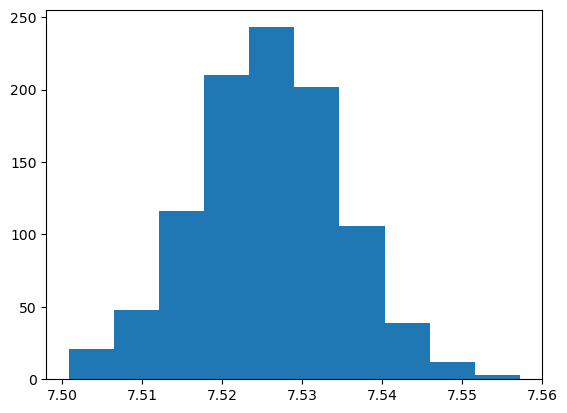

In [6]:
import matplotlib.pyplot as plt

plt.hist(mean_flavors_1000)

Comparing sampling and bootstrap distributions

In [7]:
coffee_sample = df_coffee[["variety","country_of_origin","flavor"]].\
reset_index().sample(n=500)
coffee_sample

,index,variety,country_of_origin,flavor
1258,1258,Other,Mexico,7.00
182,182,Catuai,Honduras,7.92
5,5,None,Brazil,8.42
1194,1194,Typica,Mexico,7.00
289,289,Bourbon,Mexico,8.00
...,...,...,...,...
817,817,Caturra,Honduras,7.50
753,753,Caturra,Colombia,7.33
848,848,Caturra,Honduras,7.50
647,647,Caturra,Colombia,7.50


In [8]:
mean_flavors_5000 = []

for _ in range(5000):
    mean_flavors_5000.append(np.mean(coffee_sample.sample(frac=1,replace=True)['flavor']))

In [9]:
coffee_sample['flavor'].mean() # sample mean

7.53122

In [10]:
np.mean(mean_flavors_5000) # bootstrapping mean

7.531334396

Sample std sapma vs Bootstrapping standart sapma

In [11]:
coffee_sample['flavor'].std()

0.3413164300335128

In [12]:
np.std(mean_flavors_5000, ddof=1) # bootstrap std = standard error

0.015134966995681766

In [13]:
np.std(mean_flavors_5000, ddof=1) * np.sqrt(500) # bootstrap standart sapma

0.338428150395602

Confidence Intervals(Güven aralığı)

(array([  26.,  148.,  527., 1166., 1404., 1101.,  480.,  130.,   16.,
           2.]),
 array([7.4813  , 7.492548, 7.503796, 7.515044, 7.526292, 7.53754 ,
        7.548788, 7.560036, 7.571284, 7.582532, 7.59378 ]),
 <BarContainer object of 10 artists>)

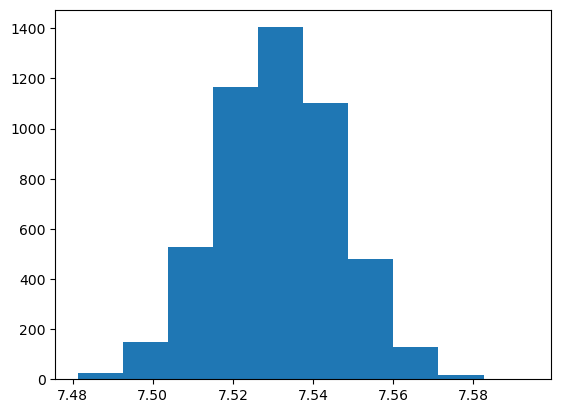

In [14]:
plt.hist(mean_flavors_5000)

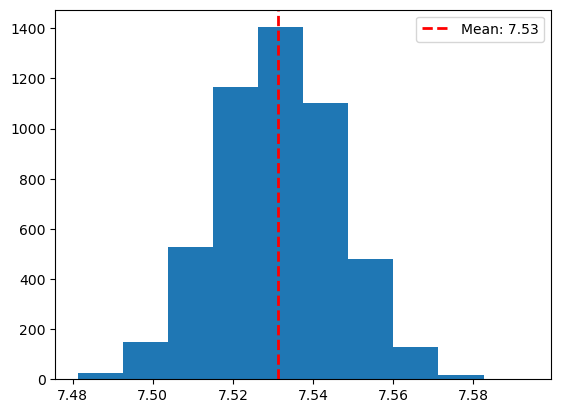

In [15]:
# Bootstrap distribution of mean flavor and mean line
plt.hist(mean_flavors_5000);
plt.axvline(np.mean(mean_flavors_5000), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(mean_flavors_5000):.2f}')
plt.legend()

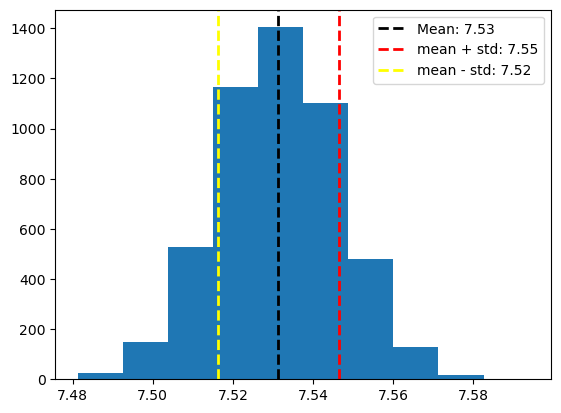

In [16]:
mean = np.mean(mean_flavors_5000)
plus_one_std = mean + np.std(mean_flavors_5000, ddof=1)
minus_one_std = mean - np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(plus_one_std, color='red', linestyle='dashed', linewidth=2, label=f'mean + std: {plus_one_std:.2f}')

plt.axvline(minus_one_std, color='yellow', linestyle='dashed', linewidth=2, label=f'mean - std: {minus_one_std:.2f}')

plt.legend()
plt.show()

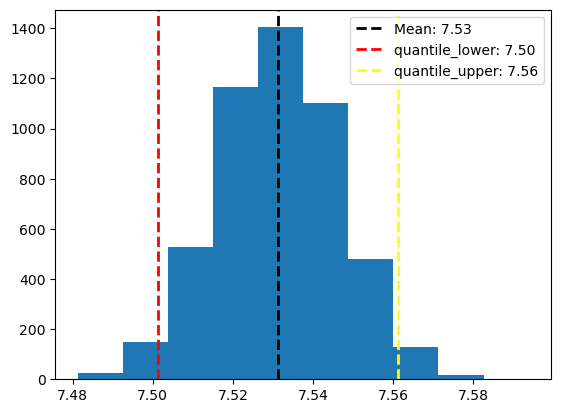

In [17]:
# Quantile method for confidence intervals

quantile_lower = np.quantile(mean_flavors_5000, 0.025)
quantile_upper = np.quantile(mean_flavors_5000, 0.975)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(quantile_lower, color='red', linestyle='dashed', linewidth=2, label=f'quantile_lower: {quantile_lower:.2f}')

plt.axvline(quantile_upper, color='yellow', linestyle='dashed', linewidth=2, label=f'quantile_upper: {quantile_upper:.2f}')

plt.legend()

##### Ters Kümülatif Fonksiyonu(Inverse cummulative distribution function)

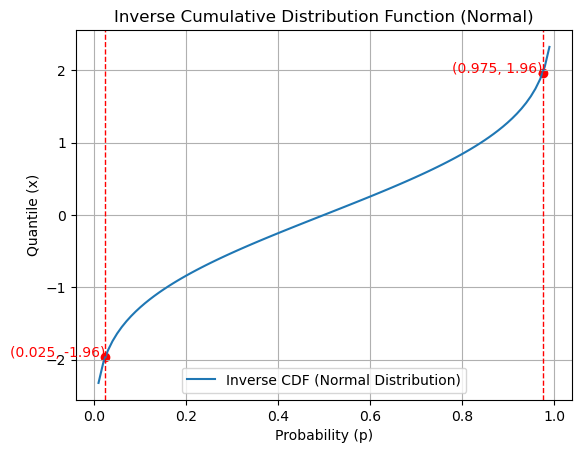

In [18]:
from scipy.stats import norm

p_values = np.linspace(0, 1, 100)

quantiles = norm.ppf(p_values, loc=0, scale=1)

plt.plot(p_values, quantiles, label="Inverse CDF (Normal Distribution)")

p1, p2 = 0.025, 0.975
quantile_025 = norm.ppf(p1)
quantile_975 = norm.ppf(p2)

plt.scatter([p1, p2], [quantile_025, quantile_975], color='red')  # Noktaları çiz
plt.axvline(p1, color='red', linestyle='dashed', linewidth=1)  # p1 için dikey çizgi
plt.axvline(p2, color='red', linestyle='dashed', linewidth=1)  # p2 için dikey çizgi

# X ve Y değerlerini grafikte gösterelim
plt.text(p1, quantile_025, f'({p1:.3f}, {quantile_025:.2f})', color='red', fontsize=10, ha='right')
plt.text(p2, quantile_975, f'({p2:.3f}, {quantile_975:.2f})', color='red', fontsize=10, ha='right')



plt.xlabel("Probability (p)")
plt.ylabel("Quantile (x)")
plt.title("Inverse Cumulative Distribution Function (Normal)")
plt.grid(True)
plt.legend()
plt.show()

Standard error method for confidence interval

Güven aralığını hesaplamak için kullanılan bu ikinci yönteme standart hata yöntemi denir. İlk olarak, bootstrap dağılımının ortalaması olan nokta tahminini ve bootstrap dağılımının standart sapması ile tahmin edilen standart hata hesaplanır. Ardından, bootstrap dağılımıyla aynı ortalama ve standart sapmaya sahip normal dağılımın ters CDF'sini elde etmek için norm.ppf çağırılır. Yine, güven aralığı 7.78 ile 7.52 arasındadır, ancak bootstrapp dağılımı tamamen normal olmadığı için sayılar geçen seferkinden biraz farklıdır.

In [19]:
point_estimate = np.mean(mean_flavors_5000)
point_estimate

7.531334396

In [20]:
std_error = np.std(mean_flavors_5000, ddof=1)
std_error

0.015134966995681766

In [21]:
from scipy.stats import norm

lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)

print(lower, upper)

7.501670405781262 7.560998386218738


#### A/B TESTING

In [22]:
df_stck = pd.read_feather("resources/stack_overflow.feather")
df_stck

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [23]:
mean_comp_samp = df_stck['converted_comp'].mean()
mean_comp_samp

119574.71738168952

In [24]:
import numpy as np

so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(
        np.mean(
            df_stck.sample(frac=1, replace=True)['converted_comp']
        )
    )

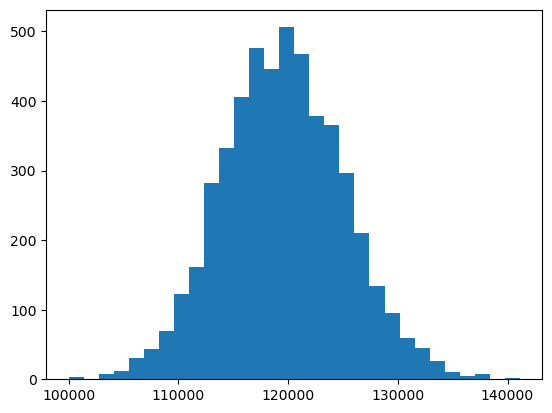

In [33]:
plt.hist(so_boot_distn, bins=30);

In [26]:
std_error = np.std(so_boot_distn, ddof=1)
std_error

5546.551405499298

In [27]:
# z-score
df_stck["converted_comp"].mean()

119574.71738168952

In [28]:
mean_comp_hyp = 110000

In [29]:
std_error

5546.551405499298

In [30]:
z_score = (mean_comp_samp - mean_comp_hyp) / std_error
z_score

1.7262469382680519

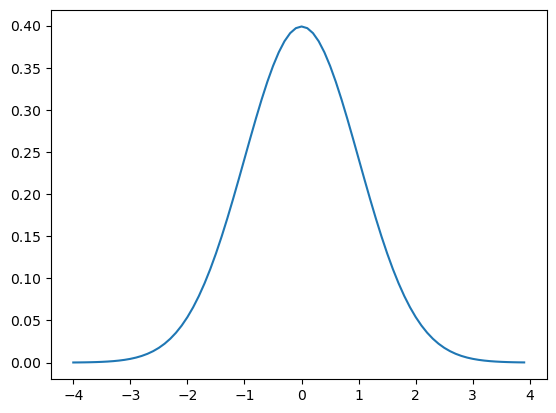

In [31]:
from scipy.stats import norm

z_data = np.arange(-4,4,0.1)

plt.plot(z_data, norm.pdf(z_data, loc=0, scale=1))

#### P-VALUES

In [32]:
# One-tailed and two-tailed tests
